In [1]:
library("biomaRt")
ensembl <- useMart("ensembl")

In [2]:
library("dplyr")
library("readr")


Attaching package: ‘dplyr’

The following object is masked from ‘package:biomaRt’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [71]:
datasets <- read_csv("ensembl_datasets.csv")

Parsed with column specification:
cols(
  Name = col_character(),
  Dataset = col_character()
)


In [75]:
head(datasets)

Name,Dataset
<chr>,<chr>
PinkFootedGoose,abrachyrhynchus_gene_ensembl
EasternHappy,acalliptera_gene_ensembl
AnoleLizard,acarolinensis_gene_ensembl
MidasCichlid,acitrinellus_gene_ensembl
GreatSpottedKiwi,ahaastii_gene_ensembl
Panda,amelanoleuca_gene_ensembl


In [3]:
ensembl <- useMart("ensembl", dataset="scanaria_gene_ensembl")

In [7]:
library(biomaRt)
# select mart and data set
bm <- useMart("ensembl")
bm <- useDataset("mlucifugus_gene_ensembl", mart=bm)

# Get ensembl gene ids and GO terms
EG2GO <- getBM(mart=bm, attributes=c('ensembl_gene_id','go_id'))

# examine result
head(EG2GO,15)

# Remove blank entries
EG2GO <- EG2GO[EG2GO$go_id != '',]

# convert from table format to list format
geneID2GO <- by(EG2GO$go_id,
                EG2GO$ensembl_gene_id,
                function(x) as.character(x))

ensembl_gene_id,go_id
<chr>,<chr>
ENSMLUG00000029690,GO:0016491
ENSMLUG00000029690,GO:0016020
ENSMLUG00000029690,GO:0016021
ENSMLUG00000029690,GO:0055114
ENSMLUG00000026728,GO:0005515
ENSMLUG00000026728,GO:0062023
ENSMLUG00000023866,GO:0016020
ENSMLUG00000023866,GO:0016021
ENSMLUG00000007195,GO:0003676


$ENSMLUG00000000002
[1] "GO:0003676" "GO:0003677" "GO:0005634" "GO:0003682" "GO:0043524"
[6] "GO:0005615"

$ENSMLUG00000000003
[1] "GO:0016740" "GO:0004582" "GO:0016757" "GO:0006486" "GO:0097502"
[6] "GO:0005783"

$ENSMLUG00000000004
 [1] "GO:0005515" "GO:0016020" "GO:0055085" "GO:0005216" "GO:0006811"
 [6] "GO:0006813" "GO:0051260" "GO:0005249" "GO:0008076" "GO:0005244"
[11] "GO:0005251" "GO:0005267" "GO:0034765" "GO:0071805" "GO:0005886"
[16] "GO:0016021"

$ENSMLUG00000000005
[1] "GO:0032039" "GO:0034474" "GO:0016180"

$ENSMLUG00000000006
 [1] "GO:0016020" "GO:0016021" "GO:0022857" "GO:0055085" "GO:0005215"
 [6] "GO:0006857" "GO:0035673" "GO:0005427" "GO:0015333" "GO:0035672"
[11] "GO:1902600" "GO:0005903"

$ENSMLUG00000000007
[1] "GO:0005515" "GO:0016020" "GO:0016021"

In [108]:
countGOTerms <- function() {
    
    start.time <- Sys.time()

    con = file("dataSpecies.txt", "r")
    
    while (TRUE) {
        line = readLines(con, n = 1)
        
        if ( length(line) == 0 ) {
            break
        }
        
        filtered <- datasets %>%
            filter(Name == line)
        dset <- filtered[[1,2]]
        ensembl <- useMart("ensembl", dataset=dset)
        print(nrow(getBM(attributes='ensembl_gene_id', filters = 'go', values = 'GO:0000079', mart = ensembl)))
        
    }

    close(con)
    
    end.time <- Sys.time()
    time.taken <- end.time - start.time
    print(time.taken)
}

countGOTerms()

[1] 9
[1] 10
[1] 4
[1] 39
[1] 38
[1] 12
[1] 12
[1] 13
[1] 10
[1] 20
[1] 10
[1] 15
[1] 46
[1] 13
[1] 9
[1] 8
[1] 18
[1] 8
[1] 37
[1] 8
[1] 22
[1] 20
[1] 62
[1] 15
[1] 13
[1] 22
[1] 13
[1] 17
[1] 13
[1] 12
[1] 11
[1] 13
[1] 12
[1] 45
[1] 42
[1] 8
[1] 17
[1] 7
[1] 12
[1] 11
Time difference of 16.39209 mins


In [1]:
library(GO.db)
Term("GO:0016021")

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome

GO:0016021 
"integral component of membrane"

In [3]:
library(ape)
library(phytools)

Loading required package: maps


ERROR: Error in decy[i] <- strwidth(y$tip.label[lsb[y$tip.label == assoc[i, 2]]]): replacement has length zero


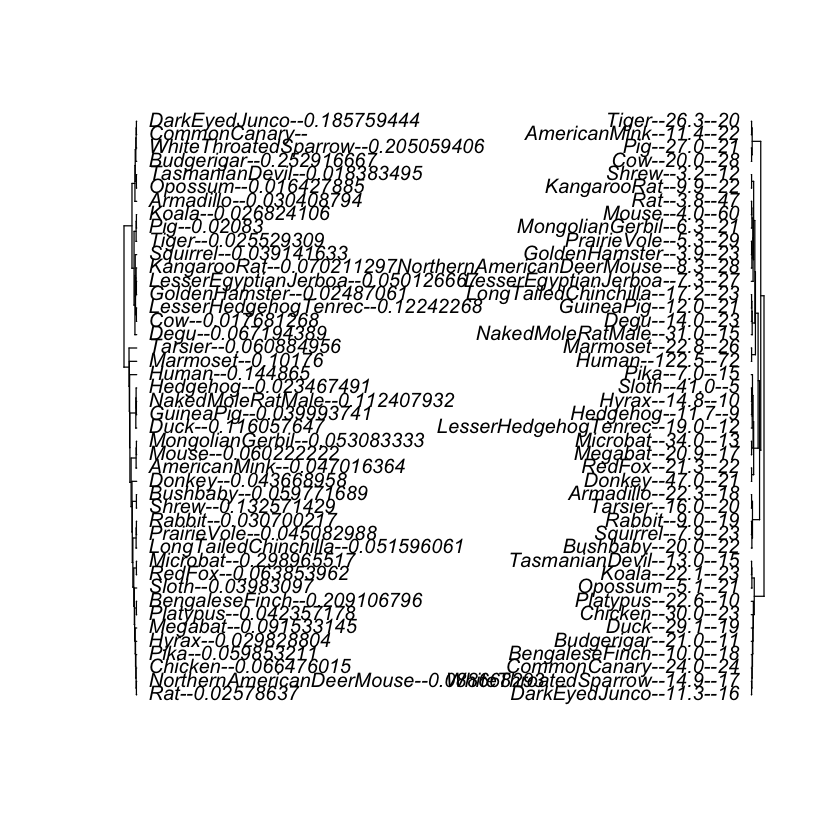

In [9]:
treefile1 <- "/Users/alexyu/Downloads/biotools/phylogeny/trees/tree_0004719.nwk"
treefile2 <- "/Users/alexyu/Downloads/biotools/phylogeny/trees/tree_negml.nwk" 

tree1 <- reorder(midpoint.root(read.tree(treefile1)), order = "cladewise")
tree2 <- reorder(midpoint.root(read.tree(treefile2)), order = "cladewise")

association <- cbind(tree1$tip.label, tree1$tip.label)
cophyloplot(tree1, tree2, assoc = association, space = 100, length.line=4, gap=1000)